In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
df.shape

(6362620, 11)

In [4]:
df.size

69988820

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df[['nameDest','nameOrig']].nunique() 

nameDest    2722362
nameOrig    6353307
dtype: int64

In [7]:
df.isFraud.value_counts # this is imbalance data so we have to balance it 

<bound method IndexOpsMixin.value_counts of 0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64>

In [8]:
df.isFlaggedFraud.value_counts() # drop this columns becaue almost unique value are there 

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

## EDA & Data Preprocessing 

In [9]:
df.drop(columns = 'isFlaggedFraud',inplace = True)

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


In [11]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [12]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [13]:
cols = ['amount','oldbalanceOrg','newbalanceOrig']

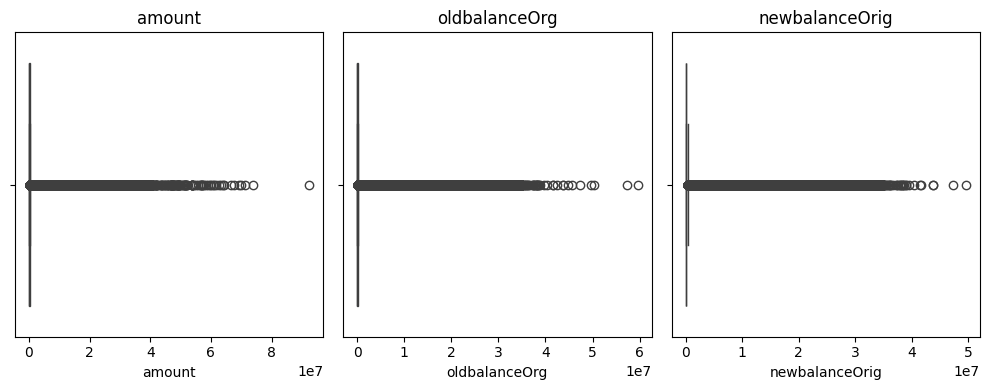

In [14]:
plt.figure(figsize=(10, 4))

for index, col in enumerate(cols):
    plt.subplot(1, 3, index+1)  
    sns.boxplot(x=df[col])       
    plt.title(col)
plt.tight_layout()
plt.show()

In [15]:
df.columns 

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [16]:
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].corr()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000


<Axes: >

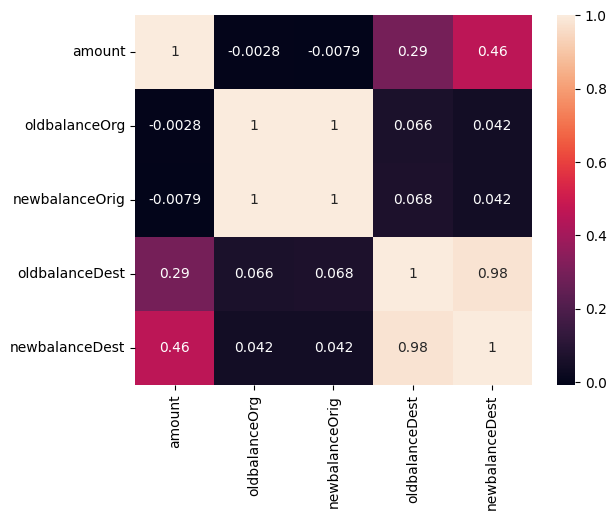

In [17]:
sns.heatmap(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest', 'newbalanceDest']].corr(),annot = True)

In [18]:
df.groupby('isFraud')['amount'].mean()

isFraud
0    1.781970e+05
1    1.467967e+06
Name: amount, dtype: float64

In [19]:
pd.crosstab(df['type'], df['isFraud'], normalize='index')

isFraud,0,1
type,,
CASH_IN,1.000000,0.000000
CASH_OUT,0.998160,0.001840
DEBIT,1.000000,0.000000
PAYMENT,1.000000,0.000000
TRANSFER,0.992312,0.007688


In [20]:
df.isFraud.value_counts() # this is a balance data so we have to balance it 

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [21]:
zero = df[df['isFraud'] == 0].sample(8213)

In [22]:
ones = df[df['isFraud'] == 1]

In [23]:
df = pd.concat([zero, ones], ignore_index=True)

In [24]:
df.shape

(16426, 10)

In [25]:
df['dest_type'] = df['nameDest'].str[0]
df['orig_type'] = df['nameOrig'].str[0]

In [26]:
df['error_balance_orig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['error_balance_dest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

In [27]:
df['orig_freq'] = df['nameOrig'].map(df['nameOrig'].value_counts())
df['dest_freq'] = df['nameDest'].map(df['nameDest'].value_counts())

In [28]:
df.drop(columns = ['nameDest','nameOrig','newbalanceOrig','newbalanceDest'],inplace = True)

In [29]:
df.head()

,step,type,amount,oldbalanceOrg,oldbalanceDest,isFraud,dest_type,orig_type,error_balance_orig,error_balance_dest,orig_freq,dest_freq
0,235,PAYMENT,16480.77,89871.05,0.00,0,M,C,0.01,1.648077e+04,1,1
1,348,TRANSFER,8576928.81,500.00,392675.14,0,C,C,8576428.81,1.862645e-09,1,1
2,420,PAYMENT,7846.27,234.00,0.00,0,M,C,7612.27,7.846270e+03,1,1
3,308,PAYMENT,30149.29,0.00,0.00,0,M,C,30149.29,3.014929e+04,1,1
4,141,CASH_IN,107909.50,1610911.47,235143.34,0,C,C,215819.00,2.158190e+05,1,1


In [32]:
df = pd.get_dummies(df, columns = ['type','dest_type','orig_type'],drop_first = True)

In [35]:
df

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,error_balance_orig,error_balance_dest,orig_freq,dest_freq,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,dest_type_M
0,235,16480.77,89871.05,0.00,0,0.01,1.648077e+04,1,1,False,False,True,False,True
1,348,8576928.81,500.00,392675.14,0,8576428.81,1.862645e-09,1,1,False,False,False,True,False
2,420,7846.27,234.00,0.00,0,7612.27,7.846270e+03,1,1,False,False,True,False,True
3,308,30149.29,0.00,0.00,0,30149.29,3.014929e+04,1,1,False,False,True,False,True
4,141,107909.50,1610911.47,235143.34,0,215819.00,2.158190e+05,1,1,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,743,339682.13,339682.13,0.00,1,0.00,0.000000e+00,1,1,True,False,False,False,False
16422,743,6311409.28,6311409.28,0.00,1,0.00,6.311409e+06,1,1,False,False,False,True,False
16423,743,6311409.28,6311409.28,68488.84,1,0.00,1.000000e-02,1,1,True,False,False,False,False
16424,743,850002.52,850002.52,0.00,1,0.00,8.500025e+05,1,1,False,False,False,True,False


In [47]:
bool_cols = df.select_dtypes(include='bool').columns

In [49]:
df[bool_cols] = df[bool_cols].astype(int)

In [51]:
df.head()

,step,amount,oldbalanceOrg,oldbalanceDest,isFraud,error_balance_orig,error_balance_dest,orig_freq,dest_freq,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,dest_type_M
0,235,16480.77,89871.05,0.00,0,0.01,1.648077e+04,1,1,0,0,1,0,1
1,348,8576928.81,500.00,392675.14,0,8576428.81,1.862645e-09,1,1,0,0,0,1,0
2,420,7846.27,234.00,0.00,0,7612.27,7.846270e+03,1,1,0,0,1,0,1
3,308,30149.29,0.00,0.00,0,30149.29,3.014929e+04,1,1,0,0,1,0,1
4,141,107909.50,1610911.47,235143.34,0,215819.00,2.158190e+05,1,1,0,0,0,0,0


In [55]:
X  = df.drop(columns = 'isFraud')
y = df['isFraud']

In [56]:
X_train,X_test,y_train,y_test  = train_test_split(X,y , random_state = 9 , test_size = 0.2)

## Modelling 

In [57]:
estimator = RandomForestClassifier(random_state = 0) # lock the random state no for the fix the data 

param_grid = {'n_estimators':list(range(1,10))} # we cakn use bootstrap here 

grid = GridSearchCV(estimator,param_grid,cv = 5,scoring = 'accuracy')

grid.fit(X_train,y_train)

grid.best_params_

{'n_estimators': 8}

In [58]:
grid.best_estimator_

,n_estimators,8
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [59]:
grid.best_estimator_.feature_importances_

array([3.07224605e-02, 1.04582940e-01, 8.61210698e-02, 5.50876416e-02,
       5.24456259e-01, 9.47886047e-03, 0.00000000e+00, 2.52993181e-04,
       2.50340977e-02, 2.73793344e-03, 5.10622811e-02, 1.74414549e-02,
       9.30220077e-02])

In [61]:
final_dt_model = dt_default = RandomForestClassifier(n_estimators = 7,random_state = 0)
final_dt_model.fit(X_train,y_train)

y_pred_train = final_dt_model.predict(X_train)
y_pred_test = final_dt_model.predict(X_test)

print('train aaccuracy',accuracy_score(y_train,y_pred_train))
print('test accuracy is :', accuracy_score(y_test,y_pred_test))
print('cross validation score is :',cross_val_score(final_dt_model,X_train,y_train,cv = 5).mean())

train aaccuracy 0.9987062404870624
test accuracy is : 0.9896530736457699
cross validation score is : 0.9908675799086758
